In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

### First step: Inspect csv file in file editor

In [3]:
titanic = pd.read_csv("titanic.csv")

In [4]:
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['survived'].sum()

342

In [7]:
titanic['survived'].mean()

0.3838383838383838

In [8]:
# Absolute Counts Aggregation
titanic[['sex','survived']].groupby('sex').sum()

,survived
sex,
female,233
male,109


In [9]:
# Absolute Counts Aggregation
titanic[['sex','survived']].groupby('sex').count()

,survived
sex,
female,314
male,577


In [10]:
# Relative Counts Aggregation
titanic[['sex','survived']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


In [14]:
# Um 'age' als diskrete Variable verarbeiten zu können, kann man es
# in Klassen einteilen (=diskretisieren)
age = pd.cut(titanic['age'], [0, 18, 80]) 

In [18]:
# Nun eine Tabelle, die die bedingte relative Überlebenshäufigkeit 
# nach DREI Merkmalen aufschlüsselt: 'sex', diskretisiertes 'age' und Passagierklasse 'class'  
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [19]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

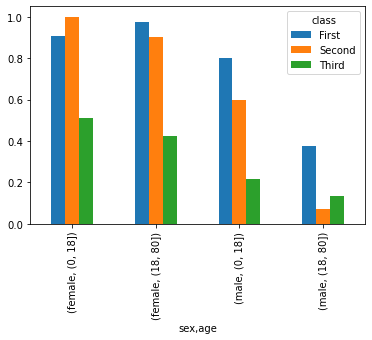

In [20]:
titanic.pivot_table('survived', ['sex', age], 'class').plot(kind="bar")

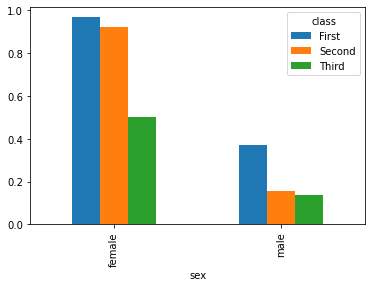

In [21]:
titanic.pivot_table('survived', index='sex', columns='class').plot(kind="bar")

## Wie kann man den Zusammenhang zwischen einem diskreten und einem metrischen Merkmal visualisieren?

### Z.B. Zusammenhang zwischen Alter und Überleben

C:\Users\hore0001\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hore0001\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'frequency')

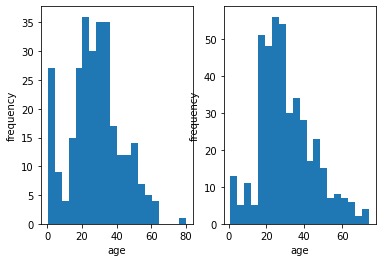

In [31]:
# Histogramme der  Altersverteilung der Überlebenden und nicht-überlebenden vergleichen
surv = (titanic.survived==1)
plt.subplot(1, 2, 1)
plt.hist(titanic.age[surv], bins=20);
plt.xlabel('age')
plt.ylabel('frequency')


plt.subplot(1, 2, 2)
nsurv = (titanic.survived==0)
plt.hist(titanic.age[nsurv], bins=20);
plt.xlabel('age')
plt.ylabel('frequency')

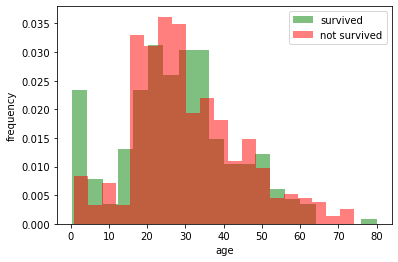

In [25]:
plt.hist(titanic.loc[surv,'age'], bins=20, alpha=0.5, label='survived', color='green', density=True); # density=True führt dazu, dass beide Histogramme auf gleiche Fläche normiert werden (und nicht absolute Zahlen darstellen)
plt.hist(titanic.loc[nsurv,'age'], bins=20, alpha=0.5, label='not survived', color='red', density=True);
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend(loc='upper right')

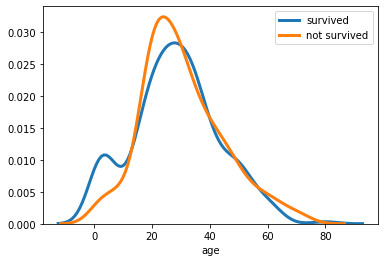

In [26]:
# Geglättete Dichtekurven als Alternative zu Histogrammen. Durch die Glättung werden die Werte aber auch verfälscht - siehe negative Alterswerte.  
import seaborn as sns
sns.distplot(titanic.age[surv], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'survived')
sns.distplot(titanic.age[nsurv], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'not survived')

#### Da Survival die Target-Variable ist, will man eigentlich die Überlebensraten für die einzelnen Altersstufen wissen, und nicht wie bisher dargestellt die Altersverteilungen für die überlebenden  bzw. nicht überlebenden:

In [32]:
# Um 'age' als diskrete Variable verarbeiten zu können, kann man es
# in Klassen einteilen (=diskretisieren)
agec = pd.cut(titanic['age'], [0, 18, 30, 40, 50, 60, 70]) 
titanic['agec'] = agec # add column 'agec' for age class
titanic[['agec','survived']].groupby('agec').mean()
# titanic.pivot_table('survived', ['sex', age], 'class')

,survived
agec,
"(0, 18]",0.503597
"(18, 30]",0.355556
"(30, 40]",0.445161
"(40, 50]",0.383721
"(50, 60]",0.404762
"(60, 70]",0.235294


# Aufgabe

##### Zwischen der embarkment_town und Überleben gibt es anscheinend einen Zusammenhang. Wie ist dieser zu erklären? (Nicht nur spekulieren, sondern Ihre Vermutungen auch in den Daten überprüfen.)

In [30]:
titanic[['survived','embarked']].groupby('embarked').mean()

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957
